In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("HousingPrices.csv")

In [ ]:
# Display basic info and first few rows
print("Dataset shape:", df.shape)
print("\nPreview of the dataset:")
print(df.head())

Dataset shape: (1460, 17)

Preview of the dataset:
   Id  LotFrontage  LotArea HouseStyle  OverallQual  OverallCond  YearBuilt  \
0   1         65.0   8450.0     2Story            7            5       2003   
1   2         80.0   9600.0     1Story            6            8       1976   
2   3         68.0  11250.0     2Story            7            5       2001   
3   4         60.0   9550.0     2Story            7            5       1915   
4   5         84.0  14260.0     2Story            8            5       2000   

   TotalBsmtSF CentralAir  1stFlrSF  2ndFlrSF  FullBath  TotalRooms  \
0        856.0          Y       856       854         2           8   
1          NaN          Y      1262         0         2           6   
2        920.0          Y       920       866         2           6   
3          NaN          Y       961       756         1           7   
4       1145.0          Y      1145      1053         2           9   

   GarageCars  GarageArea  YrSold  SalePrice  


In [ ]:
# 2. Compute mean and standard deviation of SalePrice
# ---------------------------------------------------------------
mean_price = df['SalePrice'].mean()
std_price = df['SalePrice'].std()

print("\n--- Sale Price Summary ---")
print(f"Mean Sale Price: ${mean_price:,.2f}")
print(f"Standard Deviation: ${std_price:,.2f}")


--- Sale Price Summary ---
Mean Sale Price: $180,921.20
Standard Deviation: $79,442.50


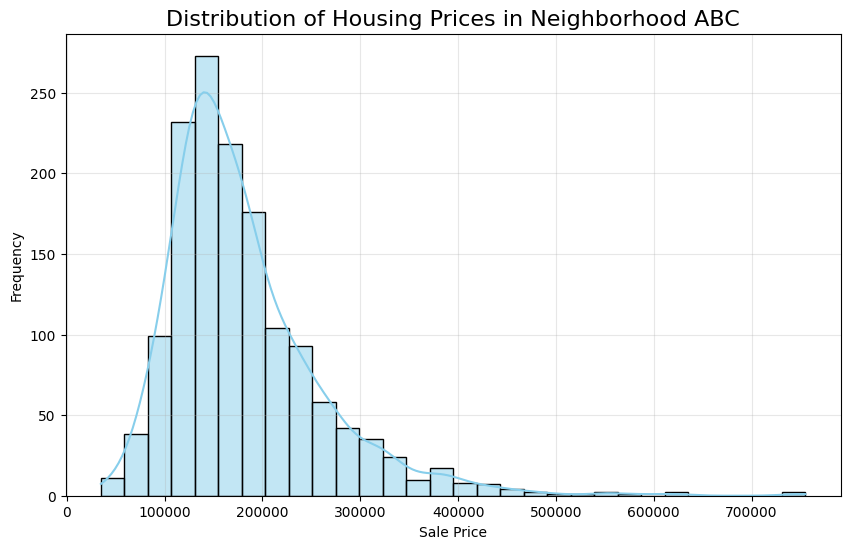

In [ ]:
# 3. Generate a histogram of the housing price
# ---------------------------------------------------------------
plt.figure(figsize=(10,6))
sns.histplot(df['SalePrice'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Housing Prices in Neighborhood ABC", fontsize=16)
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# 4. Detect potential outliers
# ---------------------------------------------------------------
# Using the Interquartile Range (IQR) method
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Identify outliers
outliers = df[(df['SalePrice'] < lower_bound) | (df['SalePrice'] > upper_bound)]
num_outliers = outliers.shape[0]

print("\n--- Outlier Analysis ---")
print(f"Number of detected outliers: {num_outliers}")
print(f"Outlier thresholds: below ${lower_bound:,.2f} or above ${upper_bound:,.2f}")


--- Outlier Analysis ---
Number of detected outliers: 61
Outlier thresholds: below $3,937.50 or above $340,037.50


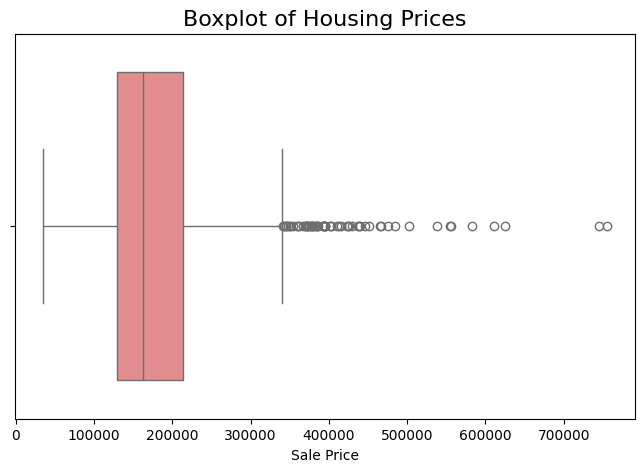

In [ ]:
# 5. Visualize outliers using a boxplot
# ---------------------------------------------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x=df['SalePrice'], color='lightcoral')
plt.title("Boxplot of Housing Prices", fontsize=16)
plt.xlabel("Sale Price")
plt.show()